In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# https://www.davidsonmorris.com/tier-2-sponsor-list/#elementor-toc__heading-anchor-0
# https://www.gov.uk/government/publications/register-of-licensed-sponsors-workers
df = pd.read_csv("2024-12-16_-_Worker_and_Temporary_Worker.csv")

In [3]:
print(df.shape)
df.head()

(124735, 5)


,Organisation Name,Town/City,County,Type & Rating,Route
0,McMullan Shellfish,Ballymena,Co Antrim,Worker (A rating),Skilled Worker
1,(IECC Care) Independent Excel Care Consortium ...,Colchester,NaN,Worker (A rating),Skilled Worker
2,*ABOUTCARE HASTINGS LTD,East Sussex,NaN,Worker (A rating),Skilled Worker
3,???£ ESS LTD,Manchester,NaN,Worker (A rating),Skilled Worker
4,@ Architect UK Ltd,West Horndon,Essex,Worker (A rating),Skilled Worker


In [4]:
print("# of Unique Organisations:")
print(df["Organisation Name"].nunique())

# Focus on "Skilled Worker"
route_value = df["Route"].value_counts()
print("# of Sponsors per Route Type:")
print(route_value)

# of Unique Organisations:
110828
# of Sponsors per Route Type:
Skilled Worker                                           106192
Global Business Mobility: Senior or Specialist Worker      9887
Tier 2 Ministers of Religion                               1663
Creative Worker                                            1519
Charity Worker                                             1354
International Sportsperson                                 1295
Religious Worker                                           1272
Global Business Mobility: Graduate Trainee                  602
Global Business Mobility: UK Expansion Worker               474
Government Authorised Exchange                              235
International Agreement                                     134
Scale-up                                                     66
Global Business Mobility: Service Supplier                   28
Seasonal Worker                                               6
Global Business Mobility: Secondment Wor

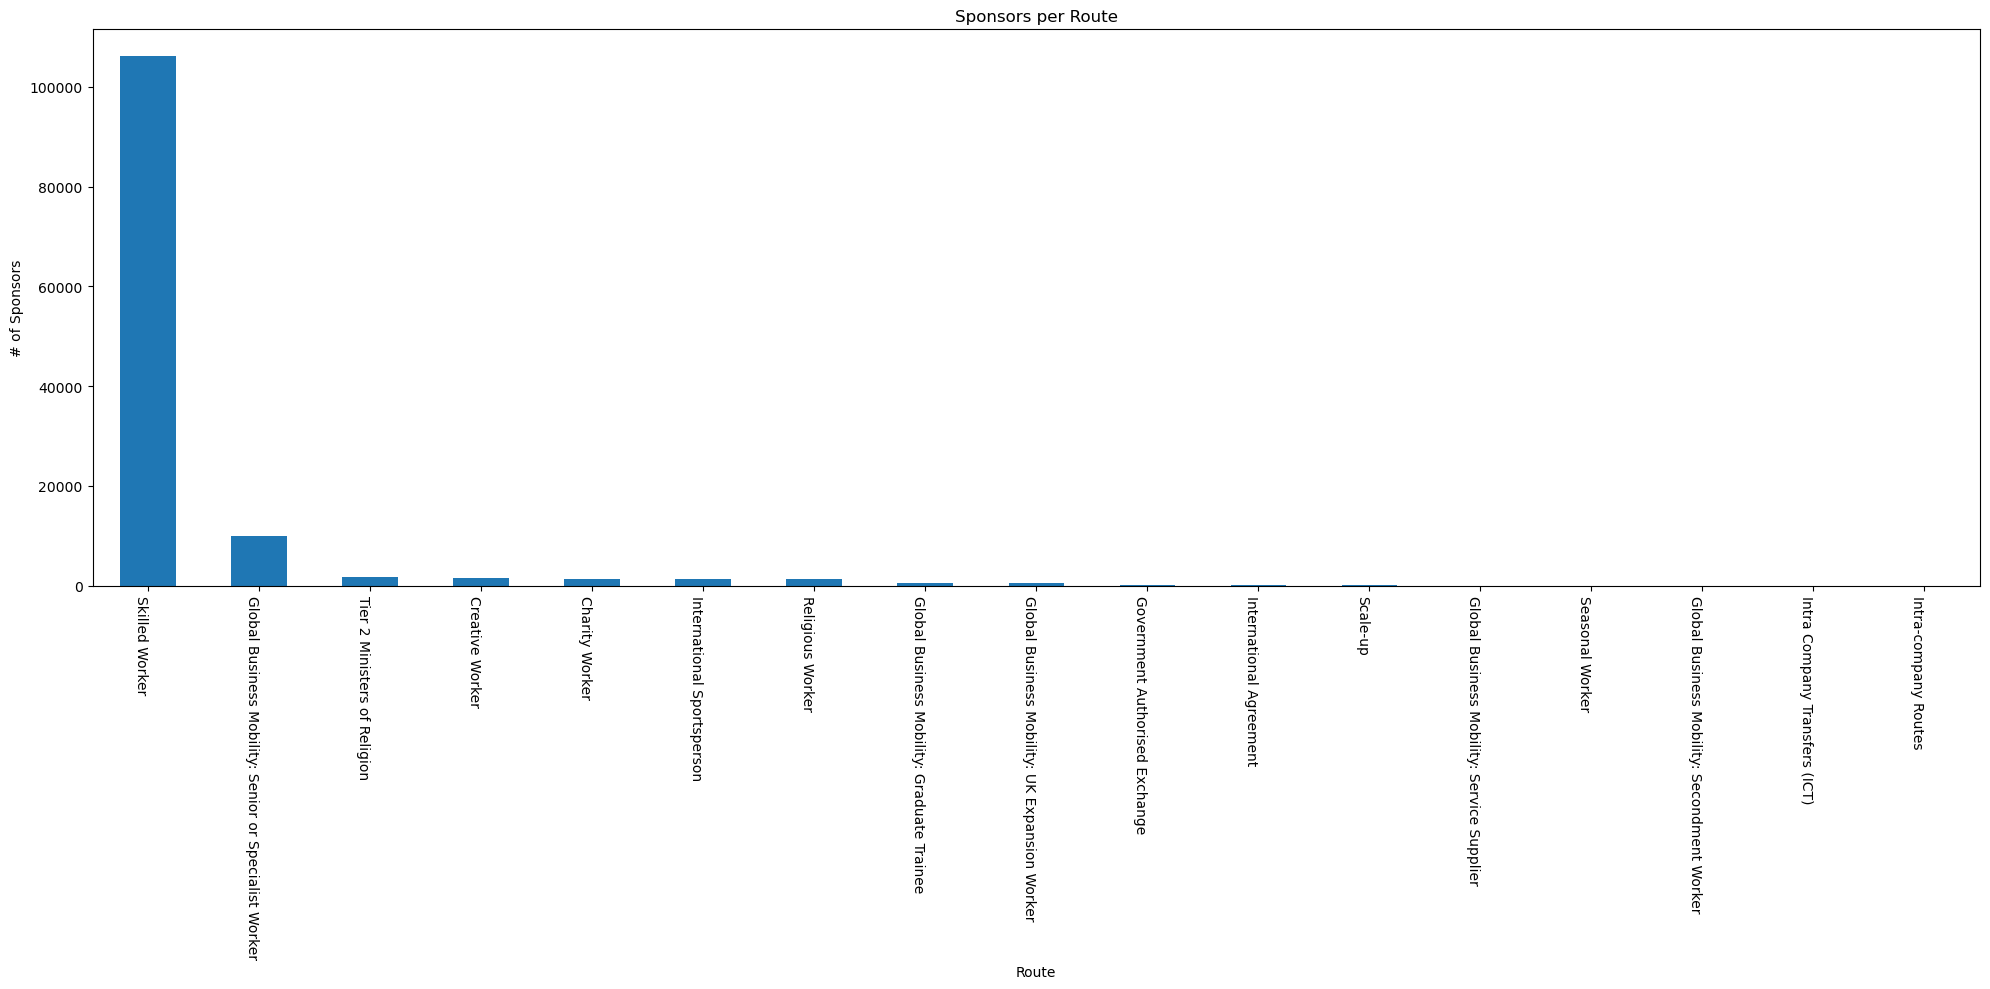

In [5]:
plt.figure(figsize=(20, 10))
route_value.plot(kind = "bar")

plt.title("Sponsors per Route")
plt.xlabel("Route")
plt.ylabel("# of Sponsors")

plt.xticks(rotation = 270, ha = "right")

plt.tight_layout()
plt.show()

In [8]:
city_value = df["Town/City"].value_counts().head(50)
print("Top 50 Cities That Offer The Most Sponsors:")
print(city_value)

Top 50 Cities That Offer The Most Sponsors:
London           34847
LONDON            3123
Birmingham        2615
Manchester        2453
Bristol           1198
Glasgow           1137
Leicester         1048
Edinburgh         1017
Reading            918
Leeds              906
Nottingham         879
Cambridge          836
Milton Keynes      793
Ilford             753
Slough             732
Coventry           728
Bradford           616
Harrow             608
Oxford             603
Liverpool          596
Luton              589
Sheffield          559
Cardiff            502
Bolton             468
Belfast            463
Southampton        460
Aberdeen           455
Derby              451
Northampton        448
Croydon            447
Watford            421
Hounslow           405
Wolverhampton      393
Essex              379
Romford            351
Peterborough       349
Southall           348
Brighton           344
Hayes              334
Norwich            333
Uxbridge           329
Kent         

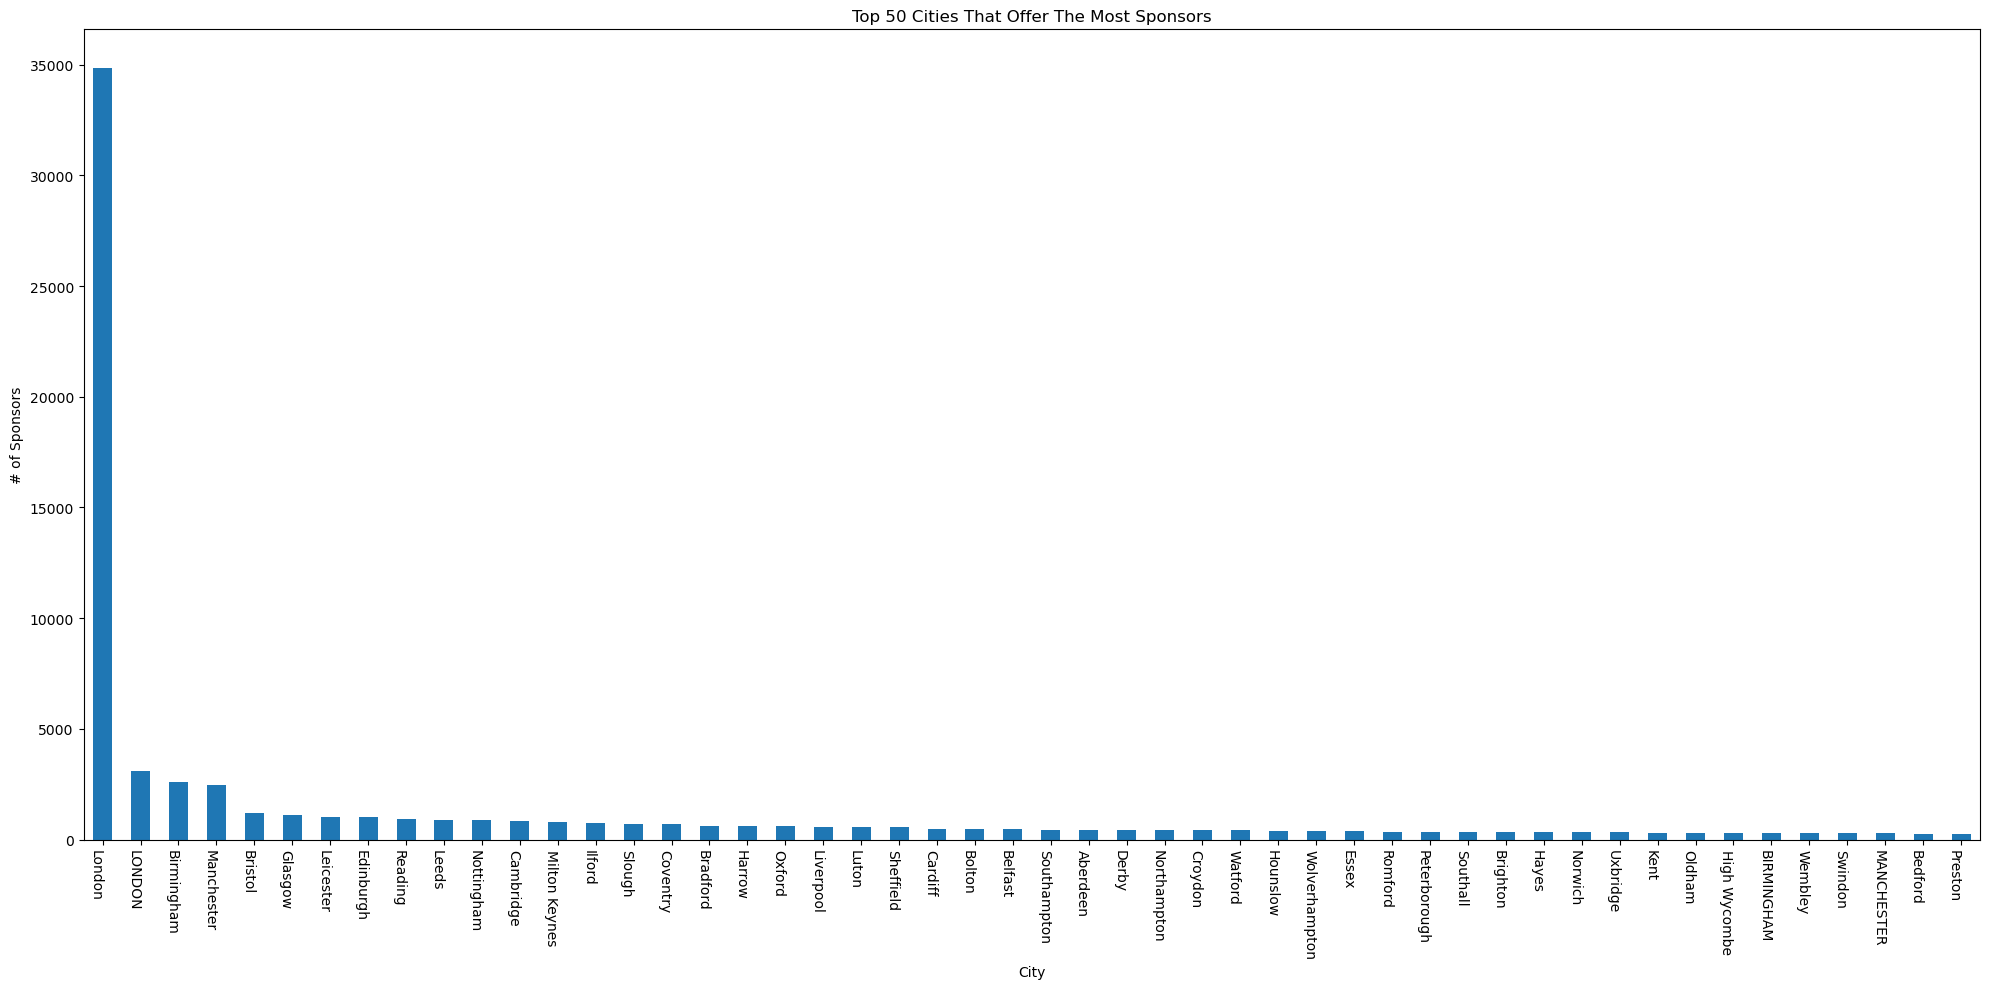

In [9]:
plt.figure(figsize=(20, 10))
city_value.plot(kind = "bar")

plt.title("Top 50 Cities That Offer The Most Sponsors")
plt.xlabel("City")
plt.ylabel("# of Sponsors")

plt.xticks(rotation = 270, ha = "right")

plt.tight_layout()
plt.show()

In [11]:
# Need to clean dataset @ City
# https://www.w3schools.com/python/ref_string_title.asp
df["Town/City"] = df["Town/City"].str.title()

cleaned_city_value = df["Town/City"].value_counts().head(50)
print("Top 50 Cities That Offer The Most Sponsors (CLEANED):")
print(cleaned_city_value)

Top 50 Cities That Offer The Most Sponsors (CLEANED):
London                 38113
Birmingham              2929
Manchester              2746
Bristol                 1315
Leicester               1262
Glasgow                 1247
Edinburgh               1115
Leeds                   1019
Nottingham              1014
Reading                 1004
Milton Keynes            902
Cambridge                899
Ilford                   893
Coventry                 834
Slough                   813
Harrow                   728
Bradford                 694
Luton                    681
Liverpool                668
Oxford                   651
Sheffield                630
Cardiff                  568
Bolton                   544
Southampton              518
Derby                    518
Aberdeen                 515
Croydon                  515
Belfast                  502
Northampton              501
Watford                  473
Wolverhampton            472
Hounslow                 466
Newcastle Upon Tyn

In [12]:
type_rating_value = df["Type & Rating"].value_counts()
print("# of Sponsors Per Rating:")
print(type_rating_value)

# of Sponsors Per Rating:
Worker (A rating)                            119259
Temporary Worker (A rating)                    5086
Worker (UK Expansion Worker: Provisional)       174
Worker (A (Premium))                             69
Worker (A (SME+))                                65
Temporary Worker (A (SME+))                      49
Worker (B rating)                                18
Temporary Worker (A (Premium))                   14
Temporary Worker (B rating)                       1
Name: Type & Rating, dtype: int64


### Ideal Conditions
- Organisation Name = Don't Care (For Now)
- Town/City = London (Preferred)
- County = N/A
- Type & Rating = Worker (A Rating)
- Route = Skilled Worker


In [16]:
check_glondon = (df["County"] == "Greater London").value_counts()
check_glondon

False    124246
True        489
Name: County, dtype: int64

In [19]:
check_london_total = (df["Town/City"] == "London").value_counts()
check_london_total

False    86622
True     38113
Name: Town/City, dtype: int64

In [31]:
check_london_only = df[df["Town/City"] == "London"]
check_london_county = check_london_only["County"].unique()
print(check_london_county)

[nan 'London' 'Fritzovia' 'n1' 'England' 'Middlesex' 'Select a State'
 'MIDDLESEX' 'Greater London' 'UK' 'Tottenham' 'UNITED KINGDOM' 'london'
 'ENGLAND' 'AA Euro Recruitment UK Ltd' 'LONDON' 'Essex' 'Westminster'
 'Barking' 'GREENWICH' 'United Kingdom' 'London,City of' 'Waltham Forest'
 'Lambeth' 'Brent' 'London, City of' 'Southwark' 'LND' 'Twickenham'
 'Bermondsey' 'City of London' 'Barnet' 'LEWISHAM' '--select--' 'NEWHAM'
 'Tower Hamlets' 'Romford' 'GL' 'Please select...' 'Surrey' 'Camden'
 'Kent' 'Hertfordshire' 'Seven Dials' 'Wandsworth' 'Bayswater'
 'County (Optional)' 'Type a choice below ...' 'United Kingdom (+44)'
 'Kensington & Chelsea' 'Please select your state' 'surrey'
 'Please Select...' 'London City Road' 'Hammersmith and Fulham'
 'Please Select' 'Ealing' 'ESSEX' 'St Pauls' 'INNER LONDON' 'Select...'
 'Highbury' 'Belgravia' 'County' 'Islington' 'Hainault' 'Greater london'
 'ENG' 'Newham, East Ham' 'Kentish Town' 'ILFORD' 'Willesden' 'Mayfair'
 'ENFIELD' 'Park Royal' 'Wem

In [42]:
# - Organisation Name = Don't Care (For Now)
# - Town/City = London (Preferred)
# - County = N/A
# - Type & Rating = Worker (A Rating)
# - Route = Skilled Worker

ideal_conditions = (
    (df["Town/City"] == "London") &
    (df["Type & Rating"] == "Worker (A rating)") &
    (df["Route"] == "Skilled Worker")
)

search_ideal = df[ideal_conditions]

print(search_ideal[["Organisation Name", "Town/City", "County", "Type & Rating", "Route"]].head())

                    Organisation Name Town/City  County      Type & Rating  \
5   @ Home Accommodation Services Ltd    London     NaN  Worker (A rating)   
13                           0086 Ltd    London     NaN  Worker (A rating)   
15                   00Nation Limited    London  London  Worker (A rating)   
16         01 ACCOUNTING SERVICES LTD    London     NaN  Worker (A rating)   
17                     012 Global Ltd    London     NaN  Worker (A rating)   

             Route  
5   Skilled Worker  
13  Skilled Worker  
15  Skilled Worker  
16  Skilled Worker  
17  Skilled Worker  


In [43]:
search_ideal.to_csv("search_ideal.csv", index = False)
print("Saved to search_ideal.csv")

Saved to search_ideal.csv


In [44]:
search_df = pd.read_csv("search_ideal.csv")
search_df.head()

,Organisation Name,Town/City,County,Type & Rating,Route
0,@ Home Accommodation Services Ltd,London,NaN,Worker (A rating),Skilled Worker
1,0086 Ltd,London,NaN,Worker (A rating),Skilled Worker
2,00Nation Limited,London,London,Worker (A rating),Skilled Worker
3,01 ACCOUNTING SERVICES LTD,London,NaN,Worker (A rating),Skilled Worker
4,012 Global Ltd,London,NaN,Worker (A rating),Skilled Worker


In [45]:
search_df.shape

(30285, 5)

In [50]:
check_company_exists = (search_df["Organisation Name"] == "012 Global Ltd")
print(f"Company exists in the dataset: {check_company_exists.any()}")

Company exists in the dataset: True


In [53]:
check_company_exists = (search_df["Organisation Name"] == "Jane Street")
print(f"Company exists in the dataset: {check_company_exists.any()}")

Company exists in the dataset: False
